In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
cd /content/drive/My Drive/7. Working with Keras: a deep dive

/content/drive/My Drive/7. Working with Keras: a deep dive


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, losses, metrics, datasets

### 7.2.1 The Sequential model

#### Listing 7.1 The Sequential class

In [ ]:
model = models.Sequential([
                           layers.Dense(units=64, activation="relu"),
                           layers.Dense(units=10, activation="softmax")
])

#### Listing 7.2 Incrementally building a Sequential model

In [ ]:
model = models.Sequential()
model.add(layers.Dense(units=64, activation="relu"))
model.add(layers.Dense(units=10, activation="softmax"))

In [ ]:
model.weights

ValueError: ignored

Layers only get built (which is to say, create their weights) when they are called for the first time. That’s because the shape of the layers' weights depend on the shape of their input: until the input shape is known, they can’t be created.

In [ ]:
model.build(input_shape=(None, 3))

In [ ]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-1.73435688e-01,  2.72846222e-03,  7.28484988e-03,
         -5.31532615e-02,  5.29460609e-02,  2.67037928e-01,
         -2.72219986e-01, -2.93261766e-01,  1.22347414e-01,
         -1.20785847e-01,  1.00852013e-01, -1.06448933e-01,
         -1.55997157e-01, -1.10152304e-01,  2.34689713e-01,
          2.72479475e-01,  2.35209405e-01,  1.25129968e-01,
          2.57454932e-01, -1.01311132e-01, -2.52152383e-01,
          1.05044097e-01, -2.58257568e-01, -8.22929740e-02,
          1.00689858e-01, -2.89693832e-01,  1.03581190e-01,
          5.73855937e-02,  1.53494507e-01, -4.96424735e-02,
          1.90430284e-01,  2.44145453e-01, -5.51801771e-02,
          1.50755554e-01,  2.67074049e-01,  6.06182218e-03,
          3.33553553e-02,  7.72813261e-02, -1.79321408e-01,
          1.87058061e-01,  3.42661142e-02,  1.05514288e-01,
          1.14699602e-02, -1.65858656e-01,  1.45797819e-01,
          1.16973042e-01, -1.96

None in the first dimension of the argument <i>input_shape</i> signals that the batch size could be anything.

Model content can be displayed using <i>summary()</i>

#### Listing 7.5 The summary method

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### Listing 7.6 Naming models and layers with the name argument

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(units=64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(units=10, activation="softmax", name="my_second_layer"))
model.build(input_shape=(None, 3))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_first_layer (Dense)       (None, 64)                256       
_________________________________________________________________
my_second_layer (Dense)      (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = models.Sequential()
model.add(keras.Input(shape=(3, )))
model.add(layers.Dense(units=64, activation="relu", name="1st_layer"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_layer (Dense)            (None, 64)                256       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Dense(units=10, activation="softmax", name="2nd_layer"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_layer (Dense)            (None, 64)                256       
_________________________________________________________________
2nd_layer (Dense)            (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_layer (Dense)            (None, 64)                256       
_________________________________________________________________
2nd_layer (Dense)            (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### 7.2.2 The Functional API

#### Listing 7.8 A simple Functional model with two Dense layers

In [ ]:
inputs = keras.Input(shape=(3, ), name="input")
features = layers.Dense(units=64, activation="relu")(inputs)
outputs = layers.Dense(units=10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs, name="model")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 3)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [ ]:
inputs = keras.Input(shape=(3), name="input")

inputs.shape

TensorShape([None, 3])

In [ ]:
features = layers.Dense(64, activation="relu")(inputs)
features.shape

TensorShape([None, 64])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 3)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### MULTI-INPUT, MULTI-OUTPUT MODELS

#### Listing 7.9 A multi-input, multi-output Functional model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from  tensorflow import keras
from tensorflow.keras import layers, Model, models, Input, optimizers, losses, metrics

In [ ]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = Input(shape=(vocabulary_size, ), name="title")
text_body = Input(shape=(vocabulary_size, ), name="text_body")
tags = Input(shape=(num_tags), name="tags")

features = layers.Concatenate(axis=1,  name="inputs")([title, text_body, tags])
features = layers.Dense(units=64, activation="relu", name="layer_1")(features)

priority = layers.Dense(units=1, activation="sigmoid", name="priority")(features)
department = layers.Dense(units=num_departments, activation="softmax", name="department")(features)

model = Model(inputs=[title, text_body, tags], outputs=[priority, department])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, 10000)]      0                                            
__________________________________________________________________________________________________
text_body (InputLayer)          [(None, 10000)]      0                                            
__________________________________________________________________________________________________
tags (InputLayer)               [(None, 100)]        0                                            
__________________________________________________________________________________________________
inputs (Concatenate)            (None, 20100)        0           title[0][0]                      
                                                                 text_body[0][0]              

#### Listing 7.10 Training a model by providing lists of input & target arrays

In [ ]:
num_samples = 1280

title_data = np.random.choice([0, 1], size=(num_samples, vocabulary_size))
text_body_data = np.random.choice([0, 1], size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.rand(num_samples,1)
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="adam",
loss=["mean_squared_error", "categorical_crossentropy"],
metrics=[["mean_absolute_error"], ["accuracy"]])

model.fit(
    x=[title_data, text_body_data, tags_data],
    y=[priority_data, department_data],
    epochs=1
)
model.evaluate(x=[title_data, text_body_data, tags_data], y=[priority_data, department_data])
model.predict(x=[title_data, text_body_data, tags_data])

40/40 [==============================] - 1s 8ms/step - loss: 4.3346 - priority_loss: 0.2597 - department_loss: 4.0750 - priority_mean_absolute_error: 0.4248 - department_accuracy: 0.2547


[array([[0.05519462],
        [0.02071598],
        [0.11060843],
        ...,
        [0.07965034],
        [0.02164993],
        [0.06509757]], dtype=float32),
 array([[0.01013444, 0.7267954 , 0.00766063, 0.25540963],
        [0.0084063 , 0.7295008 , 0.15030229, 0.11179066],
        [0.04961007, 0.58979785, 0.18747804, 0.1731139 ],
        ...,
        [0.00950267, 0.5020374 , 0.43368235, 0.05477761],
        [0.01292427, 0.9202174 , 0.04996286, 0.01689557],
        [0.03589872, 0.8876588 , 0.04045821, 0.03598428]], dtype=float32)]

In [ ]:
num_samples = 1280

title_data = np.random.choice([0, 1], size=(num_samples, vocabulary_size))
text_body_data = np.random.choice([0, 1], size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.rand(num_samples,1)
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="adam",
loss=["mean_squared_error", "categorical_crossentropy"],
metrics=[["mean_absolute_error"], ["accuracy"]])

model.fit(
    x={"tags": tags_data, "title": title_data, "text_body": text_body_data},
    y={"department": department_data, "priority": priority_data},
    epochs=1
)
model.evaluate(    x={"tags": tags_data, "title": title_data, "text_body": text_body_data},
    y={"department": department_data, "priority": priority_data})
priority_preds, department_preds = model.predict(x={"tags": tags_data, "title": title_data, "text_body": text_body_data})

40/40 [==============================] - 0s 8ms/step - loss: 8.8560 - priority_loss: 0.3199 - department_loss: 8.5361 - priority_mean_absolute_error: 0.4895 - department_accuracy: 0.0805


In [ ]:
priority_preds 

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
department_preds

array([[4.7984251e-01, 4.6792659e-01, 1.0138580e-04, 5.2129518e-02],
       [2.0434155e-01, 9.1596907e-03, 1.5667618e-05, 7.8648305e-01],
       [1.0877773e-01, 3.6968116e-03, 8.3996483e-06, 8.8751704e-01],
       ...,
       [9.9517152e-02, 5.6639360e-03, 2.0816958e-06, 8.9481682e-01],
       [6.4346135e-02, 6.7729317e-03, 2.4083554e-05, 9.2885679e-01],
       [2.2594845e-01, 3.2459699e-02, 1.1558799e-05, 7.4158031e-01]],
      dtype=float32)

#### Figure 7.2 Plot generated by plot_model() on our ticket classifier model

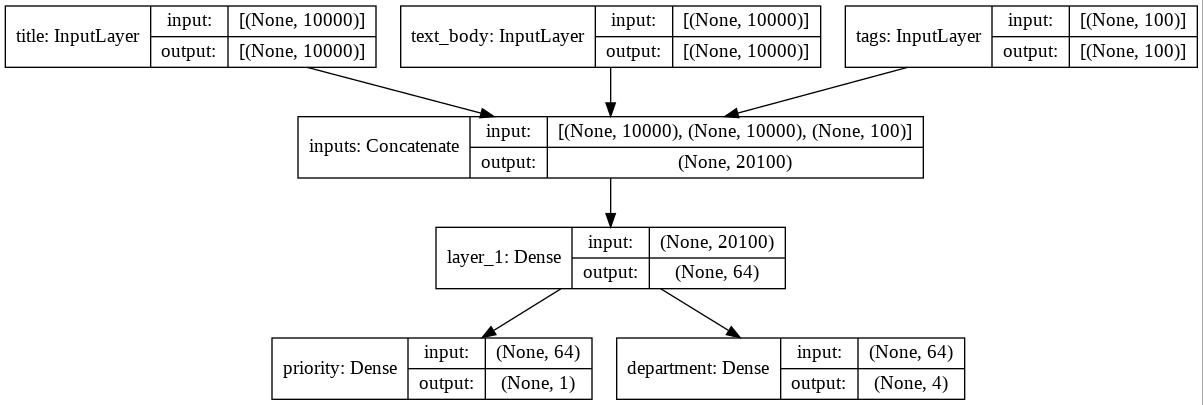

In [ ]:
keras.utils.plot_model(
    model,
    to_file="model.jpg",
    show_shapes=True
)

In [ ]:
model.layers

In [ ]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [ ]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'inputs')>

In [ ]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [ ]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'inputs')>

#### Listing 7.13 Creating a new model by reusing intermediate layer outputs

In [ ]:
features = model.layers[4].output
difficulty = layers.Dense(units=3, activation="softmax", name="difficulty")(features)

new_model = Model(inputs=[title, text_body, tags], outputs=[priority, department, difficulty])

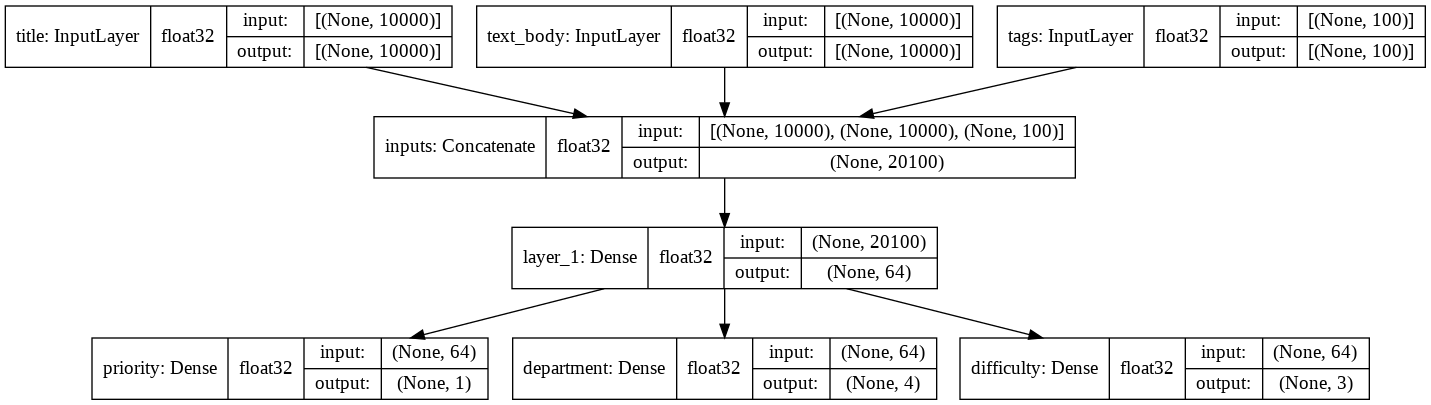

In [ ]:
keras.utils.plot_model(new_model, show_shapes=True, show_dtype=True)

### 7.2.3 Subclassing the Model class

In [ ]:
class CustomerTicketModel(Model):
  def __init__(self, num_departments):
    super().__init__()
    self.concat_layer = layers.Concatenate(axis=1)
    self.mixing_layer = layers.Dense(units=64, activation="relu")
    self.priority_scorer = layers.Dense(units=1, activation="sigmoid", name="priority")
    self.department_classifier = layers.Dense(units=num_departments, activation="softmax", name="department")
  def call(self, inputs):
    title = inputs["title"]
    text_body = inputs["text_body"]
    tags = inputs["tags"]

    features =  self.concat_layer([title, text_body, tags])
    features = self.mixing_layer(features)
    priority = self.priority_scorer(features)
    department = self.department_classifier(features)

    return priority, department

In [ ]:
num_samples = 1280

title_data = np.random.choice([0, 1], size=(num_samples, vocabulary_size))
text_body_data = np.random.choice([0, 1], size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.rand(num_samples,1)
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

In [ ]:
model = CustomerTicketModel(num_departments=4)
model(inputs={"title": title_data, "text_body": text_body_data, "tags": tags_data})

(<tf.Tensor: shape=(1280, 1), dtype=float32, numpy=
 array([[0.7039318 ],
        [0.8874796 ],
        [0.4621729 ],
        ...,
        [0.49884844],
        [0.41385147],
        [0.47027734]], dtype=float32)>,
 <tf.Tensor: shape=(1280, 4), dtype=float32, numpy=
 array([[0.09930427, 0.03770605, 0.46269876, 0.40029088],
        [0.11033072, 0.04083535, 0.21093148, 0.63790244],
        [0.10562792, 0.03715259, 0.47808504, 0.37913448],
        ...,
        [0.17339046, 0.08578003, 0.19089028, 0.5499392 ],
        [0.22782144, 0.08503535, 0.36559144, 0.3215518 ],
        [0.2614413 , 0.06049637, 0.22515209, 0.45291024]], dtype=float32)>)

In [ ]:
model.summary(
    
)

Model: "customer_ticket_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
concatenate (Concatenate)    multiple                  0         
_________________________________________________________________
dense_7 (Dense)              multiple                  1286464   
_________________________________________________________________
priority (Dense)             multiple                  65        
_________________________________________________________________
department (Dense)           multiple                  260       
Total params: 1,286,789
Trainable params: 1,286,789
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=optimizers.Adam(),
    loss=[losses.MeanSquaredError(), losses.CategoricalCrossentropy()],
    metrics=[metrics.MeanAbsoluteError(), metrics.CategoricalAccuracy()]
)
model.fit(
    x={"title": title_data, "text_body": text_body_data, "tags": tags_data},
    y={"output_1": priority_data, "output_2": department_data},
    epochs=1
)

40/40 [==============================] - 1s 15ms/step - loss: 25.9358 - output_1_loss: 0.2721 - output_2_loss: 25.6637 - output_1_mean_absolute_error: 0.4368 - output_1_categorical_accuracy: 1.0000 - output_2_mean_absolute_error: 0.4950 - output_2_categorical_accuracy: 0.3000


### 7.2.4 Mixing and matching different components

#### Listing 7.15 Creating a Functional model that includes a subclassed model

In [ ]:
class Classifier(Model):
  def __init__(self, num_classes=2):
    super().__init__()
    if num_classes == 2:
      num_units = 1
      activation = "sigmoid"
    else:
      num_units = num_classes
      activation = "softmax"
    self.dense = layers.Dense(units=num_classes, activation=activation)
  def call(self, inputs):
    return self.dense(inputs)

inputs = keras.Input(shape=(3, ))
features = layers.Dense(units=64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary(
    
)

#### Listing 7.16 Creating a subclassed model that includes a Functional model

In [ ]:
inputs = Input(shape=(64, ), name="inputs")
outputs = layers.Dense(units=1, activation="sigmoid")(inputs)
binary_classifier = Model(inputs=inputs, outputs=outputs)

class MyModel(Model):
  def __init__(self, num_classes=2):
    super().__init__()
    self.dense = layers.Dense(units=64, activation="relu", name="dense")
    self.classifier = binary_classifier
  def call(self, inputs):
    features = self.dense(inputs)
    return self.classifier(features)
model = MyModel()

In [ ]:
model = MyModel()
a = model(np.random.randint(1, 10, [1000, 128]))
a.shape

TensorShape([1000, 1])

In [ ]:
model.summary()

Model: "my_model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  8256      
_________________________________________________________________
model_8 (Functional)         (None, 1)                 65        
Total params: 8,321
Trainable params: 8,321
Non-trainable params: 0
_________________________________________________________________


## 7.3 Using built-in training and evaluation loops

#### Listing 7.17 The standard workflow: compile() / fit() / evaluate() / predict()

In [9]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, Model, optimizers, losses, metrics, models, Input
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
  inputs = Input(shape=(28 * 28, ))
  features = layers.Dense(units=512, activation="relu")(inputs)
  features = layers.Dropout(0.)(features)
  outputs = layers.Dense(units=10, activation="softmax")(features)
  return Model(inputs=inputs, outputs=outputs)
(images, labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
images = images.reshape(images.shape[0], -1) / 255.0
labels = labels.reshape(labels.shape[0], -1) 
#shuffle dataset
np.random.shuffle(np.c_[images, labels])
test_data = test_images.reshape(test_images.shape[0], -1) / 255.0
test_labels = test_labels.reshape(test_labels.shape[0], -1)
train_data, val_data = images[10000:, :], images[:10000, :]
train_labels, val_labels = labels[10000:, :], labels[:10000, :]

In [ ]:
model = get_mnist_model()
model.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=metrics.SparseCategoricalAccuracy()
)
history = model.fit(
    x=train_data,
    y=train_labels,
    epochs=3,
    validation_data=(val_data, val_labels)
)
print("Test metrics:", model.evaluate(test_data, test_labels))
print("Predicted test obserations:", model.predict(test_data))

Epoch 1/3
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2174 - sparse_categorical_accuracy: 0.9349 - val_loss: 0.1141 - val_sparse_categorical_accuracy: 0.9673
Epoch 2/3
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0947 - sparse_categorical_accuracy: 0.9727 - val_loss: 0.1364 - val_sparse_categorical_accuracy: 0.9637
Epoch 3/3
313/313 [==============================] - 1s 4ms/step - loss: 0.0945 - sparse_categorical_accuracy: 0.9748
Test metrics: [0.09453169256448746, 0.9747999906539917]
Predicted test obserations: [[1.8729543e-12 6.7151478e-14 2.5512259e-09 ... 9.9999976e-01
  4.8384539e-11 1.4822999e-07]
 [4.1155264e-14 3.2222655e-10 1.0000000e+00 ... 8.3018361e-25
  1.7263940e-13 2.3568933e-25]
 [7.8388233e-11 9.9998558e-01 1.1170090e-06 ... 1.1629460e-05
  1.4387189e-06 2.4084217e-08]
 ...
 [6.3480878e-17 8.5745959e-12 2.3796343e-13 ... 1.1388464e-06
  2.0825347e-08 5.9088286e-08]
 [2.7857400e-11 6.3918669e-11 1.4422831e-13 ... 1.0459877

train_data.dtype

In [ ]:
label_z = np.zeros((labels.shape[0], 10))

In [ ]:
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape(images.shape[0], -1) / 255.0
labels = labels.reshape(labels.shape[0], -1) 
labels = np.eye(10)[labels.squeeze()]
test_labels = keras.utils.to_categorical(test_labels)
#shuffle dataset
np.random.shuffle(np.c_[images, labels])
test_data = test_images.reshape(test_images.shape[0], -1) / 255.0
test_labels = test_labels.reshape(test_labels.shape[0], -1)
train_data, val_data = images[10000:, :], images[:10000, :]
train_labels, val_labels = labels[10000:, :], labels[:10000, :]

model = get_mnist_model()
model.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.CategoricalCrossentropy(),
    metrics=metrics.CategoricalAccuracy()
)
history = model.fit(
    x=train_data,
    y=train_labels,
    epochs=3,
    validation_data=(val_data, val_labels)
)
print("Test metrics:", model.evaluate(test_data, test_labels))
print("Predicted test obserations:", model.predict(test_data))

Epoch 1/3
1563/1563 [==============================] - 14s 8ms/step - loss: 0.2960 - categorical_accuracy: 0.9119 - val_loss: 0.1570 - val_categorical_accuracy: 0.9558
Epoch 2/3
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1640 - categorical_accuracy: 0.9528 - val_loss: 0.1181 - val_categorical_accuracy: 0.9675
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.1125 - categorical_accuracy: 0.9710
Test metrics: [0.1125088632106781, 0.9710000157356262]
Predicted test obserations: [[1.9263689e-13 1.0100325e-16 7.9891864e-11 ... 1.0000000e+00
  9.0138427e-14 3.6599841e-11]
 [8.7041485e-14 2.4024506e-12 1.0000000e+00 ... 2.2689389e-24
  2.7590976e-12 7.9864093e-27]
 [5.4964229e-09 9.9987459e-01 1.5021313e-05 ... 2.3562441e-05
  7.2014205e-05 6.2692635e-07]
 ...
 [5.2427388e-15 2.2966490e-10 2.0784449e-11 ... 2.7667829e-05
  6.3871454e-07 1.8485440e-05]
 [1.0948938e-09 6.6026479e-10 2.0447786e-12 ... 3.7874418e-13
  4.0197065e-05 7.3738741e-12]


### 7.3.1 Writing your own metrics

In [ ]:
import tensorflow
from tensorflow import keras
class RootMeanSquaredError(keras.metrics.Metric):
  def __init__(self, name="rmse", **kwargs):
    super().__init__(name=name, **kwargs)
    self.mse_sum = tf.Variable(name="mse_sum", initial_value=0.0)
    self.total_samples = self.add_weight(name="total_samples", initializer="zeros", dtype="int32")
  def update_state(self, y_true, y_pred, sample_weight=None):
    y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
    mse = tf.reduce_sum(tf.square(y_true - y_pred))
    self.mse_sum.assign_add(mse)
    self.total_samples.assign_add(tf.shape(y_true)[0])
  def result(self):
    return tf.sqrt(tf.divide(self.mse_sum, tf.cast(self.total_samples, dtype=tf.float32)))
  def reset_states(self):
    self.mse_sum.assign(0.0)
    self.total_samples.assign(0)

In [ ]:
class RootMeanSquaredError(keras.metrics.Metric):
  def __init__(self, name="rmse", **kwargs):
    super().__init__(name=name, **kwargs)
    self.mse_sum = self.Variable(name="mse_sum", initializer=tf.zeros)
    self.total_samples = self.add_weight(name="total_samples", initializer=tf.zeros, dtype="int32")
  def update_state(self, y_true, y_pred, sample_weight=None):
    y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
    mse = tf.reduce_sum(tf.square(y_true - y_pred))
    self.mse_sum.assign_add(mse)
    self.total_samples.assign_add(tf.shape(y_true)[0])
  def result(self):
    return tf.sqrt(tf.divide(self.mse_sum, tf.cast(self.total_samples, dtype=tf.float32)))
  def reset_states(self):
    self.mse_sum.assign(0.0)
    self.total_samples.assign(0)

In [ ]:
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape(images.shape[0], -1) / 255.0
labels = labels.reshape(labels.shape[0], -1) 
#shuffle dataset
np.random.shuffle(np.c_[images, labels])
test_data = test_images.reshape(test_images.shape[0], -1) / 255.0
test_labels = test_labels.reshape(test_labels.shape[0], -1)
train_data, val_data = images[10000:, :], images[:10000, :]
train_labels, val_labels = labels[10000:, :], labels[:10000, :]

In [ ]:

model = get_mnist_model()
model.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=[metrics.SparseCategoricalAccuracy(), RootMeanSquaredError()]
)
model.fit( 
    x=train_data,
    y=train_labels, 
    epochs=3,
    validation_data=(val_data, val_labels)
)
test_metrics = model.evaluate(test_data, test_labels)

Epoch 1/3
1560/1563 [============================>.] - ETA: 0s - loss: 2.3017 - sparse_categorical_accuracy: 0.1121 - rmse: 5.3660

/usr/local/lib/python3.7/dist-packages/keras/metrics.py:257: UserWarning: Metric RootMeanSquaredError implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  'consistency.' % (self.__class__.__name__,))


1563/1563 [==============================] - 13s 8ms/step - loss: 2.3017 - sparse_categorical_accuracy: 0.1120 - rmse: 5.3655 - val_loss: 2.3007 - val_sparse_categorical_accuracy: 0.1127 - val_rmse: 5.3633
Epoch 2/3
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3016 - sparse_categorical_accuracy: 0.1123 - rmse: 5.3655 - val_loss: 2.3007 - val_sparse_categorical_accuracy: 0.1127 - val_rmse: 5.3633
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 2.3009 - sparse_categorical_accuracy: 0.1135 - rmse: 5.3635


In [ ]:
model.metrics_names

['loss']

In [ ]:
callbacks_list = [
                  keras.callbacks.EarlyStopping(
                      monitor="val_sparse_categorical_accuracy",
                      patience=5
                  ),
                  keras.callbacks.ModelCheckpoint(
                      filepath='./best_model.keras',
                      monitor="val_loss",
                      save_best_only=True
                  )
]
model = get_mnist_model()
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)
model.fit(
    x=train_data,
    y=train_labels,
    epochs=10,
    callbacks=callbacks_list,
    validation_data=(val_data, val_labels)
)

Epoch 1/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2963 - sparse_categorical_accuracy: 0.9120 - val_loss: 0.1492 - val_sparse_categorical_accuracy: 0.9584
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.1654 - sparse_categorical_accuracy: 0.9537 - val_loss: 0.1284 - val_sparse_categorical_accuracy: 0.9633
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.1407 - sparse_categorical_accuracy: 0.9627 - val_loss: 0.1156 - val_sparse_categorical_accuracy: 0.9704
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1269 - sparse_categorical_accuracy: 0.9678 - val_loss: 0.1120 - val_sparse_categorical_accuracy: 0.9726
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.1183 - sparse_categorical_accuracy: 0.9699 - val_loss: 0.1151 - val_sparse_categorical_accuracy: 0.9733
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1103 -

In [ ]:
model.save('./model_save.keras')

In [ ]:
model_1 = models.load_model('./model_save.keras')
model_1.summary()

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_52 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = models.load_model("best_model.keras")
mode.summary()

### 7.3.3 Writing your own callbacks

In [ ]:
import matplotlib.pyplot as plt 

#### Listing 7.20 Creating a custom callback by subclassing the Callback class

In [ ]:
class LossHistory(keras.callbacks.Callback):
  def on_train_begin(self, logs):
    self.per_batch_losses = []
  def on_batch_end(self, batch, logs):
    self.per_batch_losses.append(logs.get("loss"))
  def on_epoch_end(self, epochs, logs):
    #plt.clf()
    plt.plot(self.per_batch_losses, label="Training loss for each batch")
    plt.xlabel(f"Batch of epoch {epochs}")
    plt.ylabel("Loss")
    plt.savefig(f"Plot_at_epoch_{epochs}")
    plt.gcf().set_size_inches(w=12, h=8)
    plt.show()
    self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2204 - accuracy: 0.9354 - val_loss: 0.1213 - val_accuracy: 0.9644


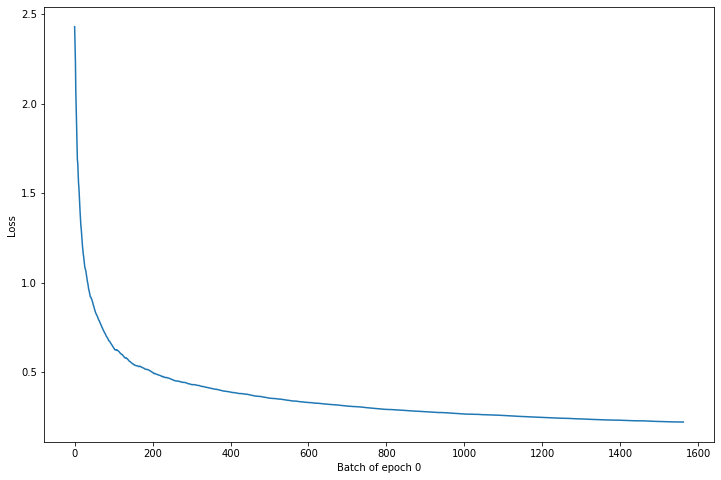

Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0977 - accuracy: 0.9719 - val_loss: 0.1082 - val_accuracy: 0.9697


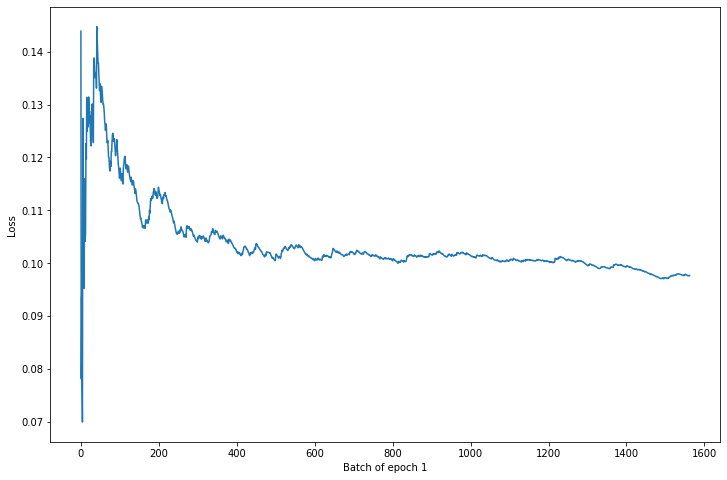

Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0684 - accuracy: 0.9811 - val_loss: 0.1124 - val_accuracy: 0.9701


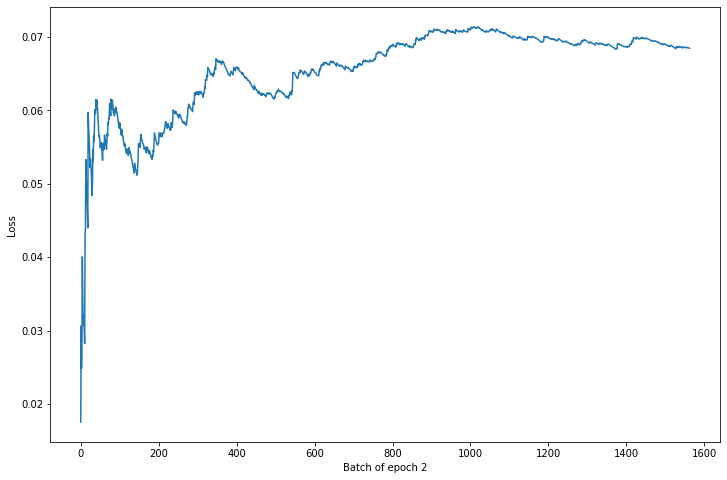

Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0540 - accuracy: 0.9851 - val_loss: 0.0981 - val_accuracy: 0.9755


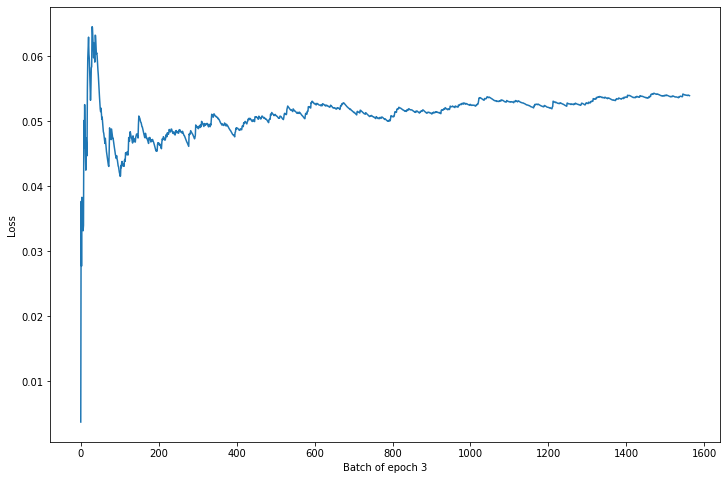

Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0412 - accuracy: 0.9886 - val_loss: 0.0973 - val_accuracy: 0.9767


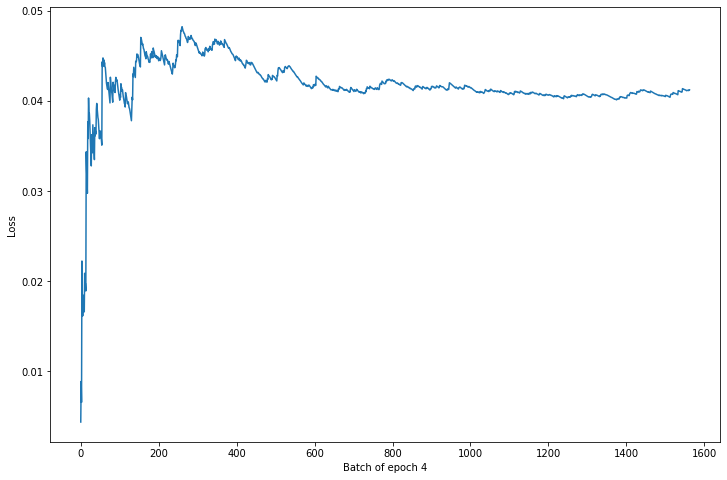

Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0335 - accuracy: 0.9911 - val_loss: 0.1013 - val_accuracy: 0.9785


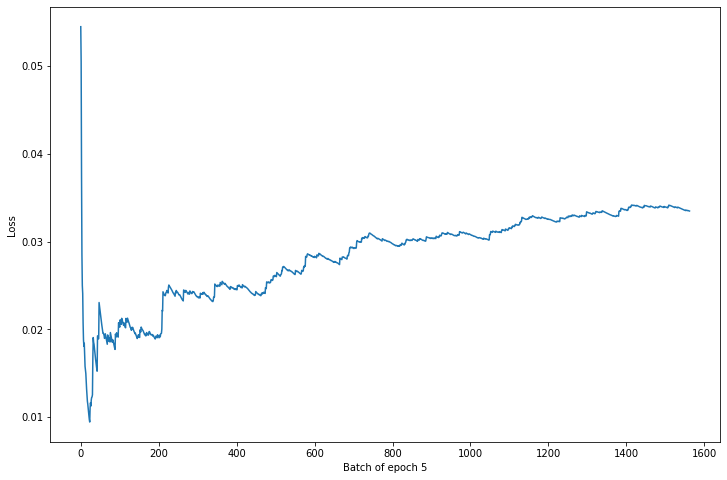

Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0267 - accuracy: 0.9925 - val_loss: 0.1028 - val_accuracy: 0.9787


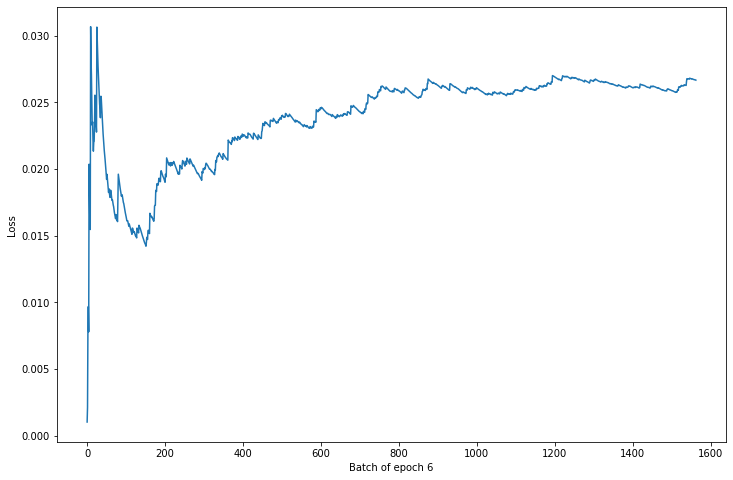

Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0212 - accuracy: 0.9943 - val_loss: 0.1066 - val_accuracy: 0.9796


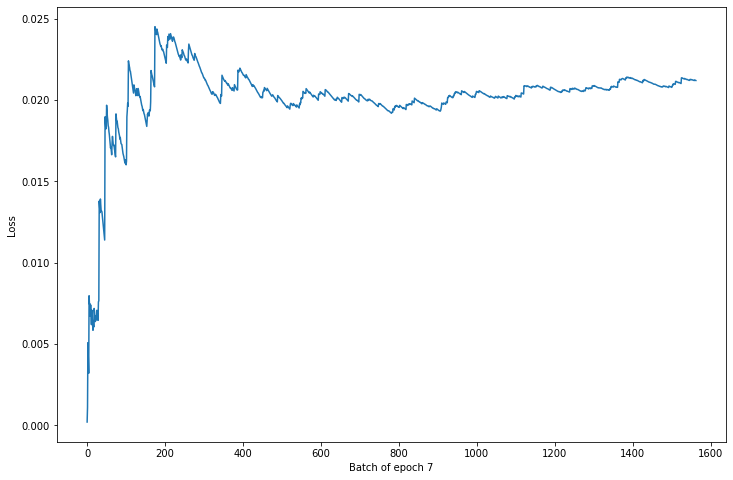

Epoch 9/10
 312/1563 [====>.........................] - ETA: 9s - loss: 0.0142 - accuracy: 0.9967

KeyboardInterrupt: ignored

In [ ]:
model =get_mnist_model()
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(
    x=train_data,
    y=train_labels,
    epochs=10,
    callbacks=LossHistory(),
    validation_data=(val_data, val_labels)
)

In [ ]:
model = get_mnist_model()
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
tensorboard = keras.callbacks.TensorBoard(log_dir="/logs_tensorboard",)
model.fit(
    x=train_data,
    y=train_labels,
    epochs=10, 
    validation_data=(val_data, val_labels),
    callbacks=[tensorboard]
)

Epoch 1/10
1563/1563 [==============================] - 47s 7ms/step - loss: 0.2169 - accuracy: 0.9362 - val_loss: 0.1330 - val_accuracy: 0.9616
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0935 - accuracy: 0.9728 - val_loss: 0.1010 - val_accuracy: 0.9719
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0658 - accuracy: 0.9810 - val_loss: 0.0976 - val_accuracy: 0.9742
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0508 - accuracy: 0.9854 - val_loss: 0.0908 - val_accuracy: 0.9767
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0402 - accuracy: 0.9884 - val_loss: 0.0985 - val_accuracy: 0.9781
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0321 - accuracy: 0.9904 - val_loss: 0.0881 - val_accuracy: 0.9799
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0253 - accuracy: 0.9930 - val_loss: 0.0980 - val_ac

In [ ]:
!tensorboard --logdir /logs_tensorboard

2021-09-23 17:14:39.992810: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-09-23 17:14:39.992923: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (306db6731121): /proc/driver/nvidia/version does not exist

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.6.0 at http://localhost:6006/ (Press CTRL+C to quit)


## 7.4 Writing your own training and evaluation loops

### 7.4.1 Training versus inference

In [4]:
def train_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs, training=True)
    loss = loss_fn(targets, predictions)
  gradients = tape.gradients(loss, model.trainble_weights)
  optimizer.apply_gradients(zip(model.trainalbe_weights, gradients))

In [ ]:
metric = keras.metrics.SparseCategoricalAccuracy()
target = [0, 1, 3]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(target, predictions)
metric.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.6666667>

In [ ]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
  print(mean_tracker.update_state(value))
  print(mean_tracker.result())


<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1.0>
tf.Tensor(0.0, shape=(), dtype=float32)
<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=2.0>
tf.Tensor(0.5, shape=(), dtype=float32)
<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=3.0>
tf.Tensor(1.0, shape=(), dtype=float32)
<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=4.0>
tf.Tensor(1.5, shape=(), dtype=float32)
<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=5.0>
tf.Tensor(2.0, shape=(), dtype=float32)


In [5]:
def get_mnist_model():
  inputs = keras.Input(shape=(28*28, ))
  features = layers.Dense(units=512, activation="relu")(inputs)
  features = layers.Dropout(rate=0.5)(features)
  outputs = layers.Dense(units=10, activation="softmax")(features)
  return keras.Model(inputs=inputs, outputs=outputs)

#### Listing 7.21 Writing a step-by-step training loop: the training step function

In [6]:
model = get_mnist_model() #initialize the mnist model

loss_fn = keras.losses.SparseCategoricalCrossentropy() #prepare loss function
optimizers = keras.optimizers.RMSprop() #prepare optimizer
metrics = [keras.metrics.SparseCategoricalAccuracy()] #prepare a metric list to monitor
loss_tracking_metric = keras.metrics.Mean() #mean metric tracker
 #logs of metrics and losses

def train_step(inputs, targets):
  with tf.GradientTape() as tape: #run the forward pass
    predictions = model.call(inputs=inputs, training=True) #forward pass
    loss = loss_fn(targets, predictions) #forward pass
  gradients = tape.gradient(loss, model.trainable_weights) #backward pass
  optimizers.apply_gradients(zip(gradients, model.trainable_weights)) #backward pass

  logs = {}
  for metric in metrics: #keep track of metrics
    metric.update_state(targets, predictions) #keep track of metrics
    logs[metric.name] = metric.result() #keep track of metrics
  loss_tracking_metric.update_state(loss) #keep track of losses
  logs["loss"] = loss_tracking_metric.result()  #keep track of losses
  return logs

#### Listing 7.22 Writing a step-by-step training loop: resetting the metrics

In [7]:
def reset_metrics():
  for metric in metrics:
    metric.reset_states()
  loss_tracking_metric.reset_states()

In [10]:
from tensorflow.keras.datasets import mnist
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape(images.shape[0], -1).astype(np.float32) / 255
test_images = test_images.reshape(test_images.shape[0], -1).astype(np.float32) / 255
np.random.shuffle([images, labels])
train_images = images[10000:]
train_labels = labels[10000:]
val_images = images[:10000]
val_labels = labels[:10000]

### Listing 7.23 Writing a step-by-step training loop: the loop itself

In [ ]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
      logs = train_step(inputs_batch, targets_batch)
    print("Result at epoch {:d}".format(epoch))
    for key, value in logs.items():
        print("\t\tMetric {}: {}".format(key, value))


Result at epoch 0
		Metric sparse_categorical_accuracy: 0.9899799823760986
		Metric loss: 0.041126228868961334
Result at epoch 1
		Metric sparse_categorical_accuracy: 0.992579996585846
		Metric loss: 0.032609835267066956
Result at epoch 2
		Metric sparse_categorical_accuracy: 0.9941200017929077
		Metric loss: 0.025637684389948845


In [ ]:
import time

In [ ]:
t1 = time.time()
def test_step(inputs, targets):  

  logs = {}
  # loss = 0.0
  # optimizers = keras.optmizers.RMSprop()
  # metrics = [keras.metrics.SparseCategoricalAccuracy()]
  # loss_fn = keras.losses.SparseCategoricalCrossentropy()
  # loss_tracking_metric = keras.metrics.Mean()


  predictions = model(inputs, training=False)
  loss = loss_fn(targets, predictions)

  for metric in metrics:
    metric.update_state(targets, predictions)
    logs["val " + metric.name] = metric.result()
    loss_tracking_metric.update_state(loss)
  logs["val_loss"] = loss_tracking_metric.result()
  return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
  logs = test_step(inputs_batch, targets_batch)
print("Evaluation Result:")
for key, value in logs.items():
  print("{}: {}".format(key, value))
t2 = time.time()

In [ ]:
print(t2 - t1)

2.6560099124908447


In [ ]:
t1 = time.time()
@tf.function
def test_step(inputs, targets):  

  logs = {}
  # loss = 0.0
  # optimizers = keras.optmizers.RMSprop()
  # metrics = [keras.metrics.SparseCategoricalAccuracy()]
  # loss_fn = keras.losses.SparseCategoricalCrossentropy()
  # loss_tracking_metric = keras.metrics.Mean()


  predictions = model(inputs, training=False)
  loss = loss_fn(targets, predictions)

  for metric in metrics:
    metric.update_state(targets, predictions)
    logs["val " + metric.name] = metric.result()
    loss_tracking_metric.update_state(loss)
  logs["val_loss"] = loss_tracking_metric.result()
  return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
  logs = test_step(inputs_batch, targets_batch)
print("Evaluation Result:")
for key, value in logs.items():
  print("{}: {}".format(key, value))
t2 = time.time()

Evaluation Result:
val sparse_categorical_accuracy: 0.9678999781608582
val_loss: 0.1587599664926529


In [ ]:
t2 - t1

0.961442232131958

   ### 7.4.5 Leveraging fit() with a custom training loop

#### Listing 7.26 Implementing a custom training step to use with fit()

In [125]:
loss_fn = losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean()
class CustomModel(keras.Model):
  def train_step(self, data):
    inputs, targets = data
    with tf.GradientTape() as tape:
      predictions = self(inputs=inputs, training=True)
      loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, self.trainable_weights)
    self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

    loss_tracker.update_state(loss)
    return {"loss": loss_tracker.result()}
  
  @property
  def metrics(self):
    return [loss_tracker]

In [76]:
train_images = images[10000:]


In [77]:
train_images = images[10000:]
train_labels = labels[10000:]
val_images = images[:10000]
val_labels = labels[:10000]

In [126]:
inputs = keras.Input(shape=(28 * 28, ), name="input")
features = keras.layers.Dense(units=512, activation="relu")(inputs)
features = keras.layers.Dropout(rate=0.5)(features)
outputs = layers.Dense(units=10, activation="softmax")(features)
model = CustomModel(inputs=inputs, outputs=outputs)
model.compile(
    optimizer=keras.optimizers.Adam()
)
model.fit(
    x=train_images,
    y=train_labels,
    epochs=3,
    validation_data=(val_images, val_labels)
)

Epoch 1/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4640 - val_mean: 0.0000e+00
Epoch 2/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1511 - val_mean: 0.0000e+00
Epoch 3/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1153 - val_mean: 0.0000e+00


In [94]:
inputs = keras.Input(shape=(28 * 28, ), name="input")
features = keras.layers.Dense(units=512, activation="relu")(inputs)
features = keras.layers.Dropout(rate=0.5)(features)
outputs = layers.Dense(units=10, activation="softmax")(features)
model = CustomModel(inputs=inputs, outputs=outputs)
model.compile(
    optimizer=keras.optimizers.Adam()
)
model.fit(
    x=train_images,
    y=train_labels,
    epochs=3,
    validation_data=(val_images, val_labels)
)

Epoch 1/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4426 - val_mean: 0.0000e+00
Epoch 2/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1740 - val_mean: 0.0000e+00
Epoch 3/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1374 - val_mean: 0.0000e+00


In [127]:
class CustomModel(keras.Model):
  def train_step(self, data): 
    inputs, targets = data
    with tf.GradientTape() as tape:
      predictions = self(inputs=inputs, training=False)
      loss = self.compiled_loss(targets, predictions)
    gradients = tape.gradient(loss, self.trainable_weights)
    self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
    self.compiled_metrics.update_state(targets, predictions)

    return {m.name: m.result() for m in self.metrics}

In [128]:
model.optimizer

In [129]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)
model.compile(optimizer=keras.optimizers.RMSprop(),
loss=keras.losses.SparseCategoricalCrossentropy(),
metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2169 - sparse_categorical_accuracy: 0.9367
Epoch 2/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0951 - sparse_categorical_accuracy: 0.9724
Epoch 3/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0688 - sparse_categorical_accuracy: 0.9804
